# Exercise 2: Interpreting a human genome
https://docs.google.com/document/d/1pEwde6BreDBbwrdqVPWBwGNECPdqRxH9c61T44p5aqU/edit

Hello! You are part of a CSI team who tries to determine as much as possible genetic information on the genome at hand.

---
# Prerequisites

1. Download the genome file from here:
https://www.dropbox.com/s/atdw13kd8nlexe3/genome.txt?dl=0

2. Note that I use the word loci and SNPs interchangeably. 


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [ ]:
!wget https://www.dropbox.com/s/atdw13kd8nlexe3/genome.txt

--2021-06-03 14:56:53--  https://www.dropbox.com/s/atdw13kd8nlexe3/genome.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/atdw13kd8nlexe3/genome.txt [following]
--2021-06-03 14:56:54--  https://www.dropbox.com/s/raw/atdw13kd8nlexe3/genome.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2956da9bdfbd61aeac9ee38ea3.dl.dropboxusercontent.com/cd/0/inline/BPtj6KCB0n4DknTOvmt0naK2pxgbgzy8Y-p49boaRrPWnG_fTSdoEzgQ1OIqTWuxtI1KshyFKu2UY6JZE1QRoT9uLSncaZ91N1jWKSog2vUNLGk9Zc0-OICzJsmnrDBShNi4RVWWkWl-XDpp3GBIcPu2/file# [following]
--2021-06-03 14:56:54--  https://uc2956da9bdfbd61aeac9ee38ea3.dl.dropboxusercontent.com/cd/0/inline/BPtj6KCB0n4DknTOvmt0naK2pxgbgzy8Y-p49boaRrPWnG_fTSdoEzgQ1OIqTWuxtI1KshyFKu2UY6JZE1QRoT9uLSncaZ91

In [ ]:
with open('genome.txt') as f:
    lines = f.readlines()

for i, l in enumerate(lines[:30]):
    print(f'{i:2n}   {l}')

 0   # This data file generated by 23andMe at: Wed Aug 19 18:49:54 2015

 1   #

 2   # This file contains raw genotype data, including data that is not used in 23andMe reports.

 3   # This data has undergone a general quality review however only a subset of markers have been 

 4   # individually validated for accuracy. As such, this data is suitable only for research, 

 5   # educational, and informational use and not for medical or other use.

 6   # 

 7   # Below is a text version of your data.  Fields are TAB-separated

 8   # Each line corresponds to a single SNP.  For each SNP, we provide its identifier 

 9   # (an rsid or an internal id), its location on the reference human genome, and the 

10   # genotype call oriented with respect to the plus strand on the human reference sequence.

11   # We are using reference human assembly build 37 (also known as Annotation Release 104).

12   # Note that it is possible that data downloaded at different times may be different due to 

In [ ]:
df = pd.read_csv('genome.txt', sep='\t', skiprows=20, header=None)
df.columns = lines[19].replace('#', '').strip().split('\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960614 entries, 0 to 960613
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   rsid        960614 non-null  object
 1   chromosome  960614 non-null  object
 2   position    960614 non-null  int64 
 3   genotype    960614 non-null  object
dtypes: int64(1), object(3)
memory usage: 29.3+ MB


In [ ]:
df

,rsid,chromosome,position,genotype
0,rs4477212,1,82154,AA
1,rs3094315,1,752566,AG
2,rs3131972,1,752721,AG
3,rs12124819,1,776546,AA
4,rs11240777,1,798959,GG
...,...,...,...,...
960609,i4000757,MT,16526,G
960610,i4990307,MT,16527,C
960611,i4000756,MT,16540,C
960612,i4000755,MT,16548,C


---
# Technology (18 points)

##### (1) What technology has been used to produce this genome? (note: we are asking about a technology not a company)

The technology used is sequencing microarrays.

##### (2) Count the number of loci per chromosome and produce a bar graph

**Note**: Unless specifically mentioned otherwise, we assume the mitochondria (*MT*) also needs to be accounted for in all cells below.

In [ ]:
# Looking at the raw data first
df.groupby(['chromosome'])['position'].nunique()

chromosome
1     76906
2     77344
3     63285
4     55017
5     56019
6     63244
7     50964
8     49215
9     42968
10    50321
11    47965
12    47124
13    36078
14    30818
15    28399
16    30163
17    26686
18    27971
19    18533
20    23834
21    13404
22     1222
22    12876
MT     2458
X     26007
Y      1766
Name: position, dtype: int64

In [ ]:
# 22 is weird, let's look at the values of chromosome (22 probably appears once as string and once as int)
df['chromosome'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, '22', 'X', 'Y', 'MT'], dtype=object)

In [ ]:
# That was indeed the case, let's fix it
df.loc[df['chromosome'] == '22', 'chromosome'] = 22

df['chromosome'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 'X', 'Y', 'MT'], dtype=object)

In [ ]:
# Looking at the counts again
df.groupby(['chromosome'])['position'].nunique()

chromosome
1     76906
2     77344
3     63285
4     55017
5     56019
6     63244
7     50964
8     49215
9     42968
10    50321
11    47965
12    47124
13    36078
14    30818
15    28399
16    30163
17    26686
18    27971
19    18533
20    23834
21    13404
22    14098
MT     2458
X     26007
Y      1766
Name: position, dtype: int64

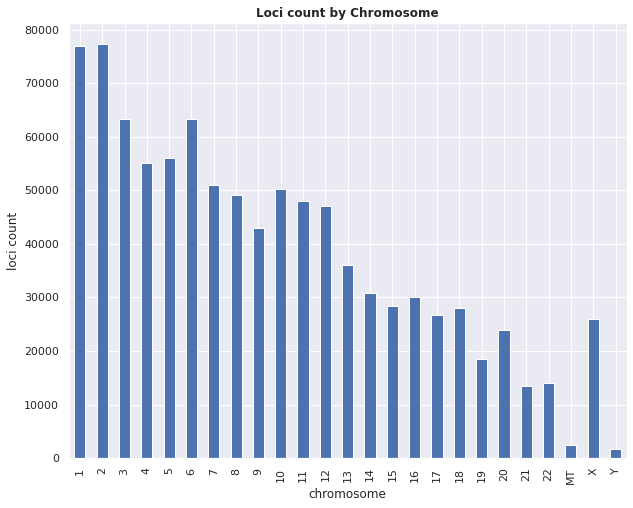

In [ ]:
# Now we see that chromo. 22 has 14098 unique loci, which is 12876 + 1222 (what we had before for each of the 22s).
# (this was a sanity check)


# Drawing the graph:
loci_count_per_chromo_df = df.groupby(['chromosome'])[['position']].nunique()

loci_count_per_chromo_df.plot.bar(figsize=(10, 8))
plt.ylabel('loci count')
plt.legend().set_visible(False)
plt.title('Loci count by Chromosome', fontdict={'weight': 'bold'});

##### (3) How many loci does the file have?

In [ ]:
# Locus can be interpreted as an rsid, or as the location on the human genome.
# Assuming we want to count unique loci on the human genome (if 2 rsids point to the same locus, count it as 1):

(df['chromosome'].astype(str) + " " + df['position'].astype(str)).nunique()

960587

In [ ]:
# The following loci appear more than once:

rsids_per_locus = df.groupby(['chromosome', 'position']).nunique()
non_unique_loci_df = df.set_index(['chromosome', 'position']).loc[rsids_per_locus[rsids_per_locus['rsid'] > 1].index]

print(f'There are {non_unique_loci_df.shape[0]} non unique loci: \n')
non_unique_loci_df

There are 54 non unique loci: 



rsid genotype
chromosome position                      
1          40555167     i5000892       GG
           40555167     i5012624       GG
           40558081     i5000896       TT
           40558081     i5012622       TT
           209823368    i5005063       GG
           209823368    i5012669       GG
2          47630475   rs63750334       DD
           47630475   rs63750644       II
           219525942  rs28937590       AA
           219525942    i5012660       AA
6          51923147     i5000041       GG
           51923147     i5012612       GG
7          92130876   rs61750420       CC
           92130876     i5012688       CC
9          104184181    i5012664       GG
           104184181    i5053866       GG
10         56077174     i5004467       GG
           56077174     i5012804       GG
11         5246716    rs35949130       II
           5246716    rs63750954       TT
           5246876    rs34188626       CC
           5246876    rs63750320       II
           5269669    rs34647752       CC
           5269669      i5008333       CC
           6638271      i5007750       GG
           6638271      i5012802       GG
           6638385      i5007754       CC
           6638385      i5012803       CC
           17418602     i5008242       GG
           17418602     i5012558       CC
           111958677  rs11214077       AA
           111958677    i5900578       AA
12         103246729  rs62507269       CC
           103246729  rs62508729       TT
15         80472572     i5005892       GG
           80472572     i5012865       GG
16         222960       i5900733       AA
           222960       i5004447       AA
           222967       i5900721       GG
           222967     rs63751096       II
           8905010    rs28936415       GG
           8905010      i5012680       GG
           31102564     i3003056       AA
           31102564     i5900608       AA
17         2573541      i3002891       GG
           2573541      i5900536       GG
           39739530   rs57799054       II
           39739530   rs61664582       CC
22         51063820   rs28940893       GG
           51063820     i5012765       GG
           51065593     i5004811       GG
           51065593     i5012767       CC
MT         11719       rs2853495       --
           11719        i3001044        A

**Note**: As there are very few non-unique loci, we will ignore this unless specifically noted otherwise.

For all the quantitative analysis these are inconsequential.
However, for analysis of specific SNPs, these might be important.

##### (4) What’s the cost per locus (SNP) if it costs the customer $39 to get this file?

In [ ]:
# Still assuming we want the cost per unique locus on the human genome.
PRICE_PER_FILE_CENTS = 3900
f"The price per SNP is {PRICE_PER_FILE_CENTS / df.shape[0]:.4f} cents."

'The price per SNP is 0.0041 cents.'

##### (5) Find  the lengths of each chromosome of the human genome (hint: use google). 

In [ ]:
# Using data from the following ('human assembly build 37' - what the file uses): https://www.ncbi.nlm.nih.gov/assembly/GCF_000001405.13/#/st
# and for the mitochondria data from: https://en.wikipedia.org/wiki/Human_genome#cite_ref-24
# as we couldn't find a CSV with the required data online, that we can simply "!wget".

chromo_lengths = {
    1: 249904550,
    2: 243199373,
    3: 198022430,
    4: 191535534,
    5: 180915260,
    6: 171115067,
    7: 159321559,
    8: 146440111,
    9: 141696573,
    10: 135534747,
    11: 135046619,
    12: 133851895,
    13: 115169878,
    14: 107349540,
    15: 102531392,
    16: 90354753,
    17: 81529607,
    18: 78081510,
    19: 59380841,
    20: 63025520,
    21: 48157577,
    22: 51304566,
    'X': 155270560,
    'Y': 59373566,
    'MT': 16569
}

chromo_lengths_df = pd.DataFrame(chromo_lengths.values(), index=chromo_lengths.keys(), columns=['chromo_length'])
# chromo_lengths_df

###### a. Draw a scatter plot with X-axis as the length of each chromosome and the y-axis as the number of  SNPs in the file.<br>

In [ ]:
loci_count_per_chromo_df = loci_count_per_chromo_df.join(chromo_lengths_df)
# loci_count_per_chromo_df

In [ ]:
loci_per_chromo_linreg_params = stats.linregress(loci_count_per_chromo_df['chromo_length'], loci_count_per_chromo_df['position'])

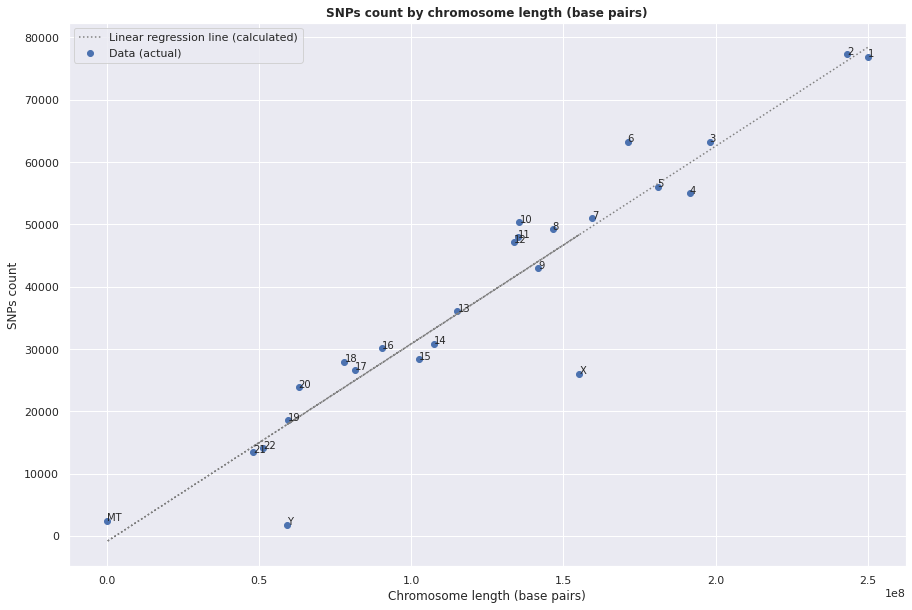

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.scatter(data=loci_count_per_chromo_df, x='chromo_length', y='position', label='Data (actual)')
for chromo_name in loci_count_per_chromo_df.index:
    ax.annotate(
        chromo_name, 
        (
            loci_count_per_chromo_df.loc[chromo_name, 'chromo_length'], 
            loci_count_per_chromo_df.loc[chromo_name, 'position']
        ))

x = loci_count_per_chromo_df['chromo_length']
a, b = loci_per_chromo_linreg_params.slope, loci_per_chromo_linreg_params.intercept
ax.plot(x, a * x + b, c='gray', linestyle=':', label='Linear regression line (calculated)')

plt.xlabel('Chromosome length (base pairs)')
plt.ylabel('SNPs count')
plt.title('SNPs count by chromosome length (base pairs)', fontdict={'weight': 'bold'})
plt.legend();

###### b. What’s the r^2 between chromosome lengths and number of SNPs?<br>

In [ ]:
np.square(loci_per_chromo_linreg_params.rvalue)

0.8938058367561167

###### c. Are there over represented or under represented chromosomes?

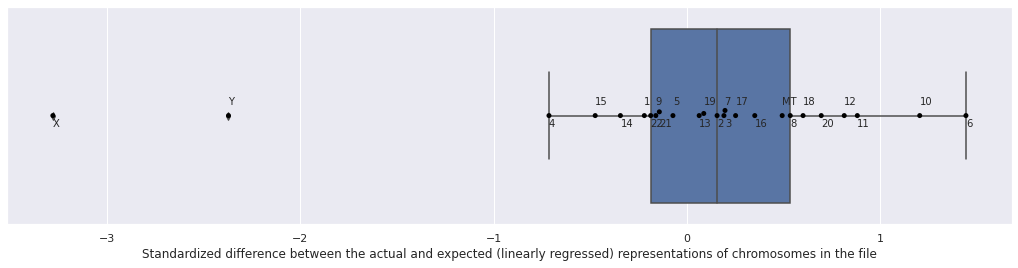

In [ ]:
loci_count_per_chromo_df['expected'] = a * loci_count_per_chromo_df['chromo_length'] + b
loci_count_per_chromo_df['delta'] = loci_count_per_chromo_df['position'] - loci_count_per_chromo_df['expected']
loci_count_per_chromo_df['delta'] = (loci_count_per_chromo_df['delta'] - loci_count_per_chromo_df['delta'].mean()) / loci_count_per_chromo_df['delta'].std()
loci_count_per_chromo_df = loci_count_per_chromo_df.sort_values(by='delta')

fig = plt.figure(figsize=(18, 4))
ax = fig.subplots()

sns.boxplot(x=loci_count_per_chromo_df['delta'], ax=ax) 
sns.swarmplot(x=loci_count_per_chromo_df['delta'], color='black', ax=ax) 

y_loc = pd.Series(
    0.05 - (0.1 * (np.arange(loci_count_per_chromo_df.shape[0]) % 2)),
    index=loci_count_per_chromo_df.index
)
for chromo_name in loci_count_per_chromo_df.index:
    ax.annotate(
        chromo_name, 
        (
            loci_count_per_chromo_df.loc[chromo_name, 'delta'], 
            y_loc[chromo_name]
        ))
    
ax.set_xlabel('Standardized difference between the actual and expected (linearly regressed) representations of chromosomes in the file');

The X and Y chromosomes are clearly under-represented (outliers when using "standard" 1.5 * IQR limits, between the actual representation, and expected one according to the linear regression we performed).

Albeit depending on our definition (what deviation we consider to be significant), we could also say that chromosomes 6, 10 are over-represented, and to a lesser degree also 11, 12- in which case we would also consider chromosome 4 as under-represented.

##### (6) Draw the interval distribution of the gap between each two loci in 1Kb (1000nt) and determine the mean and median

In [ ]:
# We replace chromosome names with "arbitrary" numbers, just to be able to do the windowed calculation, 
# as the names have no significance in this case.
distances_df = df \
    .replace(to_replace='X', value=23) \
    .replace(to_replace='Y', value=24) \
    .replace(to_replace='MT', value=25) \
    .sort_values(['chromosome', 'position']) \
    .rolling(window=2).apply(lambda x: x[1] - x[0], raw=True)


# We skip:
# a. Whatever doesn't have 0 chromosome distance (distances_df['chromosome'] == 0): 
#    skips between chromosomes (as then the distance is undefined, because the chromosomes are never arranged in one long strand).
# b. Whatever has 0 position distance (distances_df['position'] != 0) in the same chromosome (covered by distances_df['chromosome'] == 0):
#    double markings (rsids) of the same locus - inconsequential overall, but more precise this way.
considered_distances = distances_df[(distances_df['chromosome'] == 0) & (distances_df['position'] != 0)]['position'] / 1000

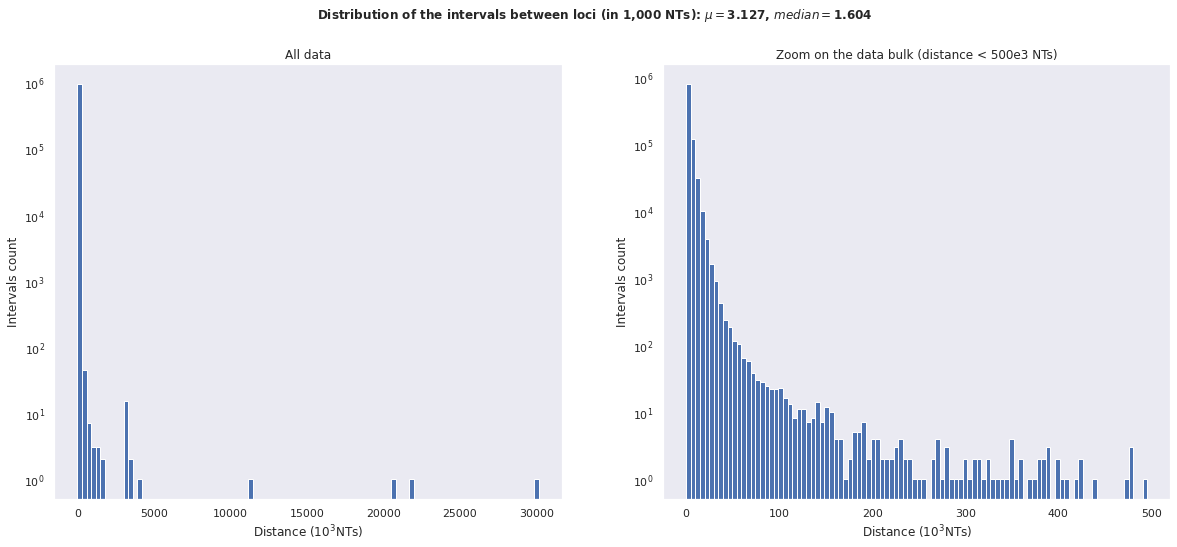

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.hist(considered_distances, bins=100)
plt.yscale('log')
plt.xlabel(r'Distance ($10^3$NTs)')
plt.ylabel('Intervals count')
plt.title('All data')
plt.grid()

plt.subplot(1, 2, 2)
plt.hist(considered_distances[considered_distances < 500], bins=100)
plt.yscale('log')
plt.xlabel(r'Distance ($10^3$NTs)')
plt.ylabel('Intervals count')
plt.title('Zoom on the data bulk (distance < 500e3 NTs)')
plt.grid()

plt.suptitle(rf'Distribution of the intervals between loci (in 1,000 NTs): $\mu=${considered_distances.mean():.3f}, $median=${considered_distances.median():.3f}', fontweight='bold');

In [ ]:
# This is just to verify, that we actually do see a pair of loci at a distane 30,000,000 (sanity test).
# And we do, in the 'Y' chromosome.

df \
    .replace(to_replace='X', value=23) \
    .replace(to_replace='Y', value=24) \
    .replace(to_replace='MT', value=25) \
    .sort_values(['chromosome', 'position']).iloc[958102:958104]

,rsid,chromosome,position,genotype
958102,rs7067386,24,28818057,G
958103,rs2641208,24,58968504,--


---
# Data (12 points)

##### (7) What’s the percentage of “no call” loci?

In [ ]:
df['genotype'].unique()

array(['AA', 'AG', 'GG', 'CC', 'AC', 'CT', 'GT', 'TT', 'CG', '--', 'AT',
       'II', 'DI', 'DD', 'ID', 'G', 'A', 'C', 'T', 'I', 'D'], dtype=object)

In [ ]:
f"{100 * df.groupby(['genotype']).size()['--'] / df.shape[0]:.2f}% of the loci are no-call."

'0.30% of the loci are no-call.'

##### (8) Only for the autosome, create a 6x6 matrix with columns as “A”, “C”, “G” and “T”, “I”, “D” and rows along the same values.<br>For each called genotype, place the call in the table based on the first and the second allele.<br>For example: “AA” will go to the first row and first column. “AC” will go to the second column and first row, and so on.<br>Report the distribution of the table. What’s the most prevalent genotype?

In [ ]:
autosome_df = df \
    .replace(to_replace='X', value=23) \
    .replace(to_replace='Y', value=24) \
    .replace(to_replace='MT', value=25) \
    .set_index(['chromosome']).loc[1:22].reset_index()

only_called_autosome_df = autosome_df[autosome_df['genotype'] != '--']

split_genotype_df = pd.concat(
    (
        only_called_autosome_df['genotype'].str.get(0), 
        only_called_autosome_df['genotype'].str.get(1)
    ), 
    axis=1)
split_genotype_df.columns = ['Genotype Start', 'Genotype End']

split_genotype_matrix_df = \
    split_genotype_df.groupby(['Genotype Start', 'Genotype End']).size().reset_index().pivot('Genotype Start', 'Genotype End', 0).fillna(0)

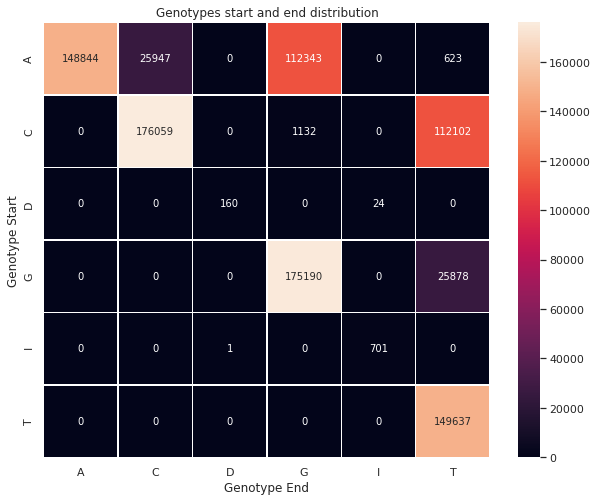

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(split_genotype_matrix_df, annot=True, fmt=".0f", linewidths=.5, ax=ax)
ax.set_title('Genotypes start and end distribution');

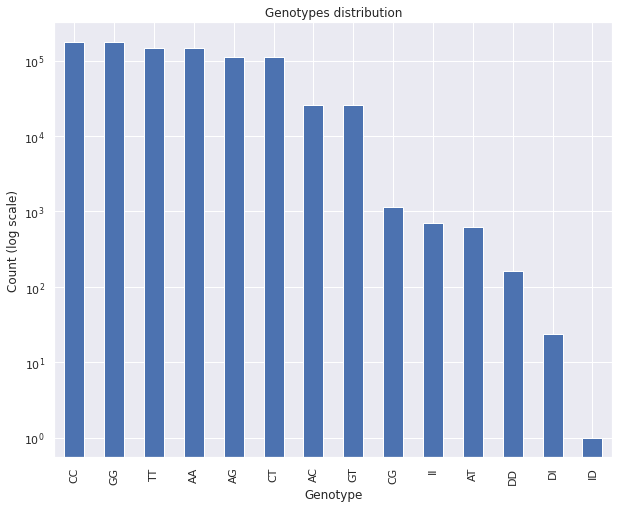

In [ ]:
only_called_autosome_df.groupby(['genotype']).size().sort_values(ascending=False).plot.bar(figsize=(10, 8))

plt.title('Genotypes distribution')
plt.yscale('log')
plt.ylabel('Count (log scale)')
plt.xlabel('Genotype');

The **CC** genotype is the most prevalent, but **GG** is a close second.

##### (9) Looking only on the autosome, what’s the percentage of loci with homozygous SNPs?

In [ ]:
# Assuming we do not want to count insertations and deletions (only A, G, C, T):

homozygous_snps_part = \
    only_called_autosome_df[only_called_autosome_df['genotype'].isin(['AA', 'CC', 'GG', 'TT'])].shape[0] \
    / \
    only_called_autosome_df[~(only_called_autosome_df['genotype'].str.contains('I') | only_called_autosome_df['genotype'].str.contains('D'))].shape[0]

f"{100 * homozygous_snps_part:.2f}% of the SNPs are homozygous."

'70.03% of the SNPs are homozygous.'

##### (10) Is this person a male or a female? Explain why.

This person is a male (has the Y chromosome).


---
# Health (20 points)

##### (11) ApoE is a gene that has three types of alleles: ApoE2, ApoE3, and ApoE4. 
##### Read the SNPedia page on ApoE (www.snpedia.com/index.php/APOE).



###### (a) Create a function that takes the genome file of a person and returns the ApoE status.

**Note** We created a functions (for ApoE and DeltaF508 retrieval) that operate on a pandas df instead of directly on a file(path), so that there will not be a need to load the fie twice (in the later "Scale Up" question).

Otherwise, we could have incorporated the *prepare_df* function in both methods.

In [ ]:
def get_start_of_file(filepath):
    with open(filepath) as f:
        lines = f.readlines()

    for i, l in enumerate(lines[:30]):
        if "# rsid	" in l:
            return i
    return -1

In [ ]:
def prepare_df(filename):
    start_index = get_start_of_file(filename)
    with open(filename) as f:
        lines = f.readlines()
    df = pd.read_csv(filename, sep='\t', skiprows=start_index+1, header=None)
    df.columns = lines[start_index].replace('#', '').strip().split('\t')
    return df  

In [ ]:
def get_ApoE_status(df):
    rs429358_genotype = None
    rs7412_genotype = None

    try:
        rs429358_genotype = df[df['rsid'] == 'rs429358']['genotype'].values[0]
        rs7412_genotype = df[df['rsid'] == 'rs7412']['genotype'].values[0]

        # initialise data of lists
        data = {
            'rs429358 = TT': ['Apo-ε2/ε2 (good; lowest risk)', 'Apo-ε2/ε3', 'Apo-ε3/ε3 (the most common)'],
            'rs429358 = CT': ['Apo-ε1/ε2', 'Apo-ε1/ε3 or Apo-ε2/ε4 (ambiguous ε2/ε4 or ε1/ε3)', 'Apo-ε3/ε4'],
            'rs429358 = CC': ['Apo-ε1/ε1 (the rare missing allele)', 'Apo-ε1/ε4', 'Apo-ε4/ε4 (~11x increased Alzheimer\'s risk)']
        }

        # Creates pandas DataFrame
        statuses_df = pd.DataFrame(data, index = ['rs7412 = TT', 'rs7412 = CT', 'rs7412 = CC'])

        status = statuses_df[f'rs429358 = {rs429358_genotype}'][f'rs7412 = {rs7412_genotype}']
    except: 
        # In case the person's alleles are not in the table
        status = 'Unknown'

    return [status, rs429358_genotype, rs7412_genotype]

In [ ]:
# df = prepare_df('genome.txt')
apoe_data = get_ApoE_status(df)

In [ ]:
print(f'The person\'s status is: "{apoe_data[0]}".')

The person's status is: "Apo-ε3/ε3 (the most common)".


###### (b) For the person of interest, what are the two ApoE alleles?


In [ ]:
print(f'The person\'s rs429358 allele is "{apoe_data[1]}".')
print(f'His/hers rs7412 allele is "{apoe_data[2]}".')

The person's rs429358 allele is "TT".
His/hers rs7412 allele is "CC".


###### (c) What can you tell this person about her/his risk to Alzheimer?

###### Answer:
Looking at the data from the table below (from SNPEDIA), the person has the most common allelic variants of ApoE.<br>
"The most common variant overall is the "standard" ApoE-ε3, and therefore more people inherited one ApoE-ε3 from each parent than any other of the possible pairs of variants."

**APOE3 is the most common and not believed to affect Alzheimer’s risk** (https://www.nia.nih.gov/news/study-reveals-how-apoe4-gene-may-increase-risk-dementia#:~:text=APOE3%20is%20the%20most%20common,of%20fat%20in%20the%20bloodstream.)

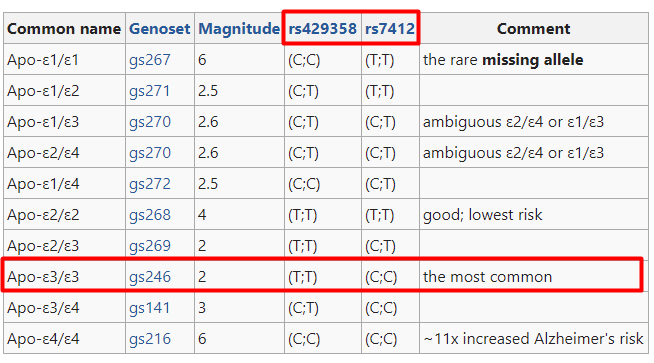

We also wanted to have a look at SNP **rs4420638** because "... rs4420638 ... has a powerful association with late-onset AD (corrected p value was 5.3 x 10 e-34). No other SNP showed as robust an association. ...", but unfortunately, it's not in the file.

In [ ]:
df[df['rsid'] == 'rs4420638']

,rsid,chromosome,position,genotype


##### (12) Delta F508 is the most prevalent mutation in Cystic Fibrosis, a recessive disease. For the sake of the exercise, let’s assume it is the only mutation that causes Cystic Fibrosis. Read the SNPedia page on Cystic Fibrosis (www.snpedia.com/index.php/Cystic_Fibrosis).

###### (a) Create a function that takes the genome file of a person and returns the Delta F508.

In [ ]:
def get_delta_F508(df):   
    rs113993960_genotype = df[df['rsid'] == 'rs113993960']['genotype']
    i3000001_genotype = df[df['rsid'] == 'i3000001']['genotype'] # this is the one appearing in the report

    if len(rs113993960_genotype) > 0:
        f508_value = rs113993960_genotype.values[0]
    elif len(i3000001_genotype) > 0:
        f508_value = i3000001_genotype.values[0]
    else:
        f508_value = 'Unknown'

    return f508_value

In [ ]:
# df = prepare_df('genome.txt')
delta_F508_value = get_delta_F508(df)

In [ ]:
delta_F508_value

'ID'

###### (b) For the person of interest, what’s her/his Cystic Fibrosis status?

###### **Answer**:
Cystic Fibrosis is an autosomal recessive disease. 
Although most people have two working copies (alleles) of the CFTR gene, only one is needed to prevent cystic fibrosis. CF develops when neither allele can produce a functional CFTR protein. 
</br>
</br>
Looking at the results, we can see that the person has one mutation of the CF gene (D = deletion) and is therefore **a CARRIER** (see image below).<br>
From Wiki: DeltaF508 is a specific mutation within the CFTR gene involving a deletion of three nucleotides spanning positions 507 and 508 of the CFTR gene on chromosome 7, which ultimately results in the loss of a single codon for the amino acid phenylalanine (F).
</br>
</br>
It is also worth mentioning that this mutation only accounts for two-thirds (66–70%) of the CF cases worldwide. There are over 1500 other known mutations that can produce CF.

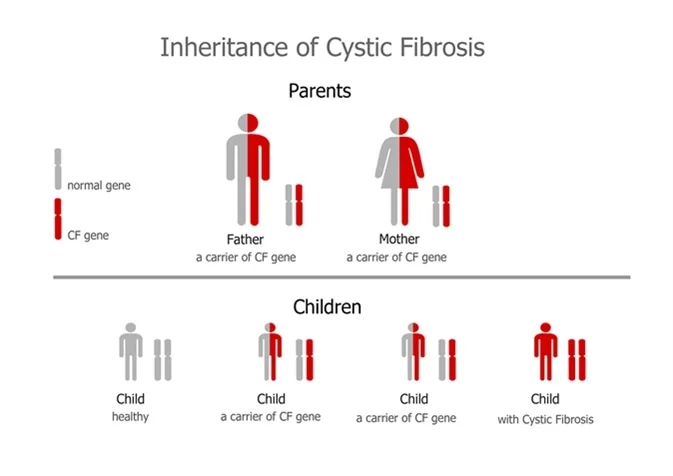

###### (c) This person considers marrying someone who is a carrier.<br> What do you recommend for this person?

###### Answer:
Cystic fibrosis (CF) is a recessive hereditary disease that affects the lungs and digestive system. The body produces thick and sticky mucus that can clog the lungs and obstruct the pancreas.<br>
CF can be life-threatening, and people with the condition tend to have a **shorter-than-normal life span**.
<br><br>
The answer is complex as it very much depends on the social norms the couple comes from, and on the risks they are willing to take.

As at least one of the partners is a CF carrier, we would advise first and foremost for the other partner to get tested for being a carrier as well, to know if the embryo might incur CF to begin with. If the other partner is negative (for carrying), then there's no chance of the the potential child to be sick. The child might still be a carrier though.

If the other partner tests positive (for carrying), the chances for the child getting CF are 1 in 4. To be able to avoid having a child with CF many options are possible. Some of them are: to either test the embryo (during the pregnancy) and abort in case it tests positive for CF (disease), IVF (by only selecting and implant healthy embryos), or use a surrogate non-CF carrier partner.

What the parents to be should actually do, depends as we said, on the risks they are willing to take for the child to be a carrier, or actually sick with CF.

---
#Scale up (25 points)


##### (13) Go to OpenSNP.org and download the *latest* 100 genomes from 23andMe.<br> For each genome, call the ApoE status and Delta F508.<br> Report the results in an Excel table with openSNP id, ApoE status, and Delta F508.

##### Help functions we used to get the data

In [ ]:
# import requests
# from lxml import html

# from bs4 import BeautifulSoup
# results = []

# num = 1
# while True:
#     page = requests.get(f'https://opensnp.org/genotypes?page={num}')
#     soup = BeautifulSoup(page.content, 'html.parser')

#     for row in soup.findAll('table')[0].findAll('tr'):
#         if not row.findAll('td'):
#             continue

#         first_column = row.findAll('td')[3].contents[0]
#         if first_column != '23andme':
#             continue
#         third_column = row.findAll('td')[4].find("a")["href"]
#         third_column = 'https://opensnp.org' + third_column[2:]
#         results.append(third_column)
#     num += 1
#     print(len(set(results)))
#     if len(set(results)) >= 103:
#         break


        

15
26
39
54
67
81
88
100
115


In [ ]:
# import os

# def is_good_file(filename):
#     try:
#         with open(filename, 'r') as f:
#             for l in f:
#                 pass
#         if get_start_of_file(filename) != 19:
#             print(get_start_of_file(filename))
#             raise Exception("bad file")
#     except:
#         print(f"Bad File: {filename}")
#         os.remove(filename) 
#         print("File Removed!")
#         return False
#     return True

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import os
# counter = 0
# for idx, res in enumerate(results):
#     if idx % 10 == 0 and idx != 0:
#         print(idx)
#     file_path_to_save = "/content/drive/MyDrive/genom/23andme/" + res.split('/')[-1]
#     os.system('curl {path} --output {f_name}'.format(path=res, f_name=file_path_to_save))
#     if is_good_file(file_path_to_save):
#         counter += 1
#     if counter == 100:
#         break
# counter

11
Bad File: /content/drive/MyDrive/genom/23andme/10303.23andme.8573
File Removed!
10
11
Bad File: /content/drive/MyDrive/genom/23andme/10276.23andme.8535
File Removed!
20
30
Bad File: /content/drive/MyDrive/genom/23andme/10219.23andme.8484
File Removed!
40
0
Bad File: /content/drive/MyDrive/genom/23andme/10213.23andme.8476
File Removed!
Bad File: /content/drive/MyDrive/genom/23andme/10197.23andme.8464
File Removed!
Bad File: /content/drive/MyDrive/genom/23andme/10195.23andme.8459
File Removed!
50
60
70
1
Bad File: /content/drive/MyDrive/genom/23andme/9742.23andme.8402
File Removed!
-1
Bad File: /content/drive/MyDrive/genom/23andme/9926.23andme.8384
File Removed!
80
-1
Bad File: /content/drive/MyDrive/genom/23andme/10094.23andme.8355
File Removed!
90
0
Bad File: /content/drive/MyDrive/genom/23andme/10070.23andme.8330
File Removed!
0
Bad File: /content/drive/MyDrive/genom/23andme/10068.23andme.8328
File Removed!
-1
Bad File: /content/drive/MyDrive/genom/23andme/10062.23andme.8326
File R

100

##### The Table

In [ ]:
path_to_23andme = '/content/drive/MyDrive/genom/23andme'

In [ ]:
import os

directory = os.fsencode(path_to_23andme)
    
info_list = [] 
bad_files = []

for idx, file in enumerate(os.listdir(directory)):

    filename = os.fsdecode(file)
    filepath = path_to_23andme + '/' + filename
    print(f'{idx+1}. {filepath}')

    try:
        df = prepare_df(filepath)
        apoe_data = get_ApoE_status(df)
        delta_F508_value = get_delta_F508(df)
        info_list.append((filename, apoe_data, delta_F508_value))
    except Exception as e:
        print(e)
        bad_files.append(filepath)

print(f"bad files:{len(bad_files)}")

1. /content/drive/MyDrive/genom/23andme/10314.23andme.8571


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


2. /content/drive/MyDrive/genom/23andme/6124.23andme.8570
3. /content/drive/MyDrive/genom/23andme/10312.23andme.8569
4. /content/drive/MyDrive/genom/23andme/10306.23andme.8564
5. /content/drive/MyDrive/genom/23andme/10305.23andme.8563
6. /content/drive/MyDrive/genom/23andme/10303.23andme.8562
7. /content/drive/MyDrive/genom/23andme/10301.23andme.8556
8. /content/drive/MyDrive/genom/23andme/10300.23andme.8552
9. /content/drive/MyDrive/genom/23andme/10295.23andme.8551
10. /content/drive/MyDrive/genom/23andme/10302.23andme.8558
11. /content/drive/MyDrive/genom/23andme/10293.23andme.8550
12. /content/drive/MyDrive/genom/23andme/9953.23andme.8549
13. /content/drive/MyDrive/genom/23andme/9702.23andme.8548
14. /content/drive/MyDrive/genom/23andme/10287.23andme.8544
15. /content/drive/MyDrive/genom/23andme/9809.23andme.8541
16. /content/drive/MyDrive/genom/23andme/10279.23andme.8537
17. /content/drive/MyDrive/genom/23andme/10274.23andme.8533
18. /content/drive/MyDrive/genom/23andme/10267.23and

In [ ]:
res = [(item[0].split('.')[2],item[1][0],item[2]) for item in info_list]
df = pd.DataFrame(res, columns=['openSNP_id', 'ApoE_status', 'Delta_F508'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

   openSNP_id                                  ApoE_status Delta_F508
0        8571                  Apo-ε3/ε3 (the most common)         II
1        8570                  Apo-ε3/ε3 (the most common)         II
2        8569                                    Apo-ε3/ε4         II
3        8564                                      Unknown         --
4        8563                  Apo-ε3/ε3 (the most common)         II
5        8562                                      Unknown         II
6        8556                                    Apo-ε3/ε4         II
7        8552                                    Apo-ε3/ε4         II
8        8551                                    Apo-ε2/ε3         II
9        8558                                    Apo-ε2/ε3         II
10       8550                  Apo-ε3/ε3 (the most common)         II
11       8549                                      Unknown         II
12       8548                                    Apo-ε3/ε4         II
13       8544       

##### (14) Report table with the frequency of the three ApoE alleles in the population and the delta F508.

**Note**: We differentiate between situations where a file contains the data, but is marked as no-call (*--*), and when the data is not present in the file at all (*Unknown*).

In [ ]:
df['ApoE_status'].value_counts()

Apo-ε3/ε3 (the most common)                    60
Apo-ε3/ε4                                      22
Apo-ε2/ε3                                       8
Unknown                                         6
Apo-ε4/ε4 (~11x increased Alzheimer's risk)     3
Apo-ε2/ε2 (good; lowest risk)                   1
Name: ApoE_status, dtype: int64

In [ ]:
df['Delta_F508'].value_counts()

II         96
--          2
DI          1
Unknown     1
Name: Delta_F508, dtype: int64

---
# GEDmatch (25 points)

##### (15) Upload the original genome to GEDmatch.<br> Use the following setting and report back the kid ID.

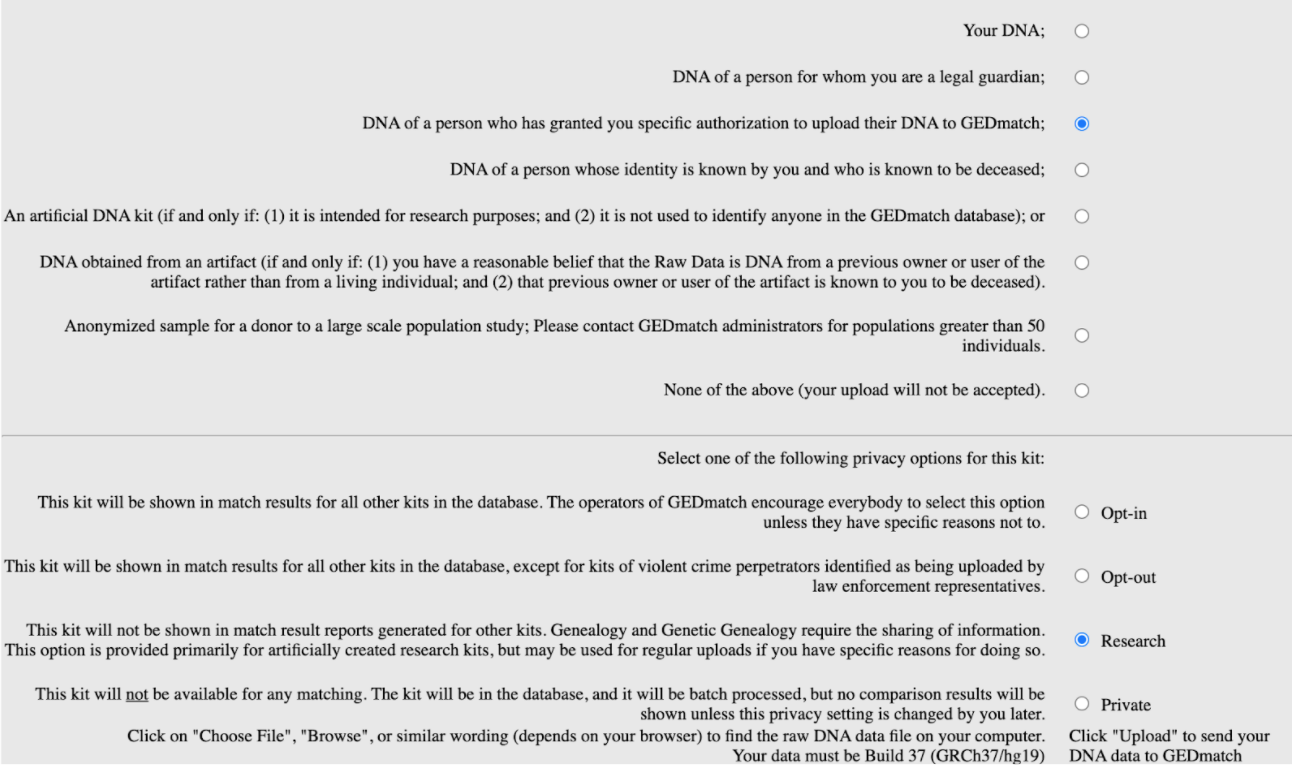

Our kit id is: **YK3912352**.

We will be using the Kit id of the original upload, as ours is a duplicate.
The original kit id is: **SE1634478**.

##### (16) Using the one-to-many tool, what’s the closest match to the person?<br> How many cM do they share?<br> What do you think is their familial relationship?

- The closest match to this person is KitID **M916841**: avizov.boris@gmail.com.
- They share a total of 249.4 cM.
- According to the data we saw in class (the segments vs. IBD chart), Boris is probably our person's $2^{nd}$ cousin. However as pointed out  in thegeneticgenealogist.com, other familiar relationships are also possible, like Boris being the $1^{st}$ cousin twice removed, or a half $1^{st}$ cousin once removed of and so on of our person$^1$.

$^1$ https://thegeneticgenealogist.com/wp-content/uploads/2017/08/Shared_cM_Project_2017.pdf

##### (17) Explore GEDmatch a bit. Are the parents of this person cousins?

According to https://app.gedmatch.com/v_compare_parents2.php, the parents of this person are not related in recent generations.

##### (18) What do you think is the  ethnic background of this person based on matches?

Some of the strongest matches (partial list down to 75 cMs) on GEDmatch are the following (accompanied by general data websites regarding the names): 
- avizov.boris@gmail.com: https://www.namespedia.com/details/Avizov
- dmashkabova@yahoo.com: https://www.name-doctor.com/name-mashka-meaning-of-mashka-14789.html
- torgovec5@mail.ru (Alexander Pinkhasov): https://www.namespedia.com/details/Pinkhasov
- larisak7057@gmail.com (Larisa Gamburg): https://www.namespedia.com/details/Larisa, https://www.name-doctor.com/name-larisa-meaning-of-larisa-11884.html
- mike.zavurov@gmail.com: https://www.namespedia.com/details/Zavurov
- yakov.rubinov@gmail.com (Yakov Rubinov): https://www.namespedia.com/details/Rubinov
- vortexmikey@gmail.com (Michael Yakubov): https://www.namespedia.com/details/Yakubov
- esuleymanov00@stuy.edu (Ester S): https://www.namespedia.com/details/Suleymanov
- danielmordehai@gmail.com
- vlad.m.shamalov@gmail.com (Vlad Shamalov): https://www.namespedia.com/details/Shamalov
- michael.gavrilov10@stjohns.edu: https://www.namespedia.com/details/Gavrilov

The *-ov* name ending indicates a Slavic origin for the name, and usually means something along the lines of "son of" / "descendent of"$^1$.

So according to a combination of names, emails, and data found online about the names of the genetic relatives of our sample, it seems that the ethnic background of our person is Slavic (most probably Russian according to the data on namespedia.com and name-doctor.com), but as there are also many Jewish traits in the names, most-probably Jewish Russian.

This is also corroborated by the fact that namespedia.com, shows that many of the non-necessarily Jewish names like Avizov and Zavurov are common in Israel in addition to Russia. The data on namespedia.com also reveals the fact that most of these slavic names are common in the USA (in fact most of the more common in the USA than Russia), which might correspond to the immigration of Russian Jews to the USA (which is the 2nd most prevalent immigration destination for Russian Jews$^2$).

<br />

The above results were further corroborated (to some extent - not entirely conclusively) by using the admixture analysis tools available on GEDmatch.

Here are some of the results (we omitted the smaller populations - generally showing only > ~10%, and test that seemed less relevant):
- **Eurogenes K36**: east Meditteranean (18.8%), near eastern (15.1%), south central Asian (10.9%), Armenian (9.3%), Italian (13.4%)
- **Eurogenes JTest**: east Meditteranean (32.5%), Ashkenazi	(16.3%), west Asian (15.5%), middle eastern (9.2%)
- **Dodecad V3**: west Asian (33.4%), Mediterranean (26.8%), southwest Asian (14.6%), west European	(11.5%).

<br />

$^1$ https://en.wikipedia.org/wiki/Slavic_name_suffixes

$^2$ https://en.wikipedia.org/wiki/History_of_the_Jews_in_Russia#Russian_Jewish_aliyah_and_immigration_to_countries_outside_of_Israel


---
# Bonus (10pt)

Consider that the sensitivity of calling correctly a rare disease variant is 100% and the specificity is 99.5%.<br> For example, consider that the disease variant is “A” and the healthy variant is “C”.<br> Now, for 1000 people who are “CC”, the 995 will be reported as “CC” and 5 as “AC”.

## (a) Based on internet searches find the allele frequency of rs386833395 for Europeans


- Acording to data downloaded from the gnomAD browser (https://gnomad.broadinstitute.org/region/17-41276044-41276044?dataset=gnomad_r2_1): the file can be downloaded at the bottom of the page using the **Export variants to CSV** button, could not provide a direct link.

- gnomAD replaces and includes the data from the ExAc browser, which is referenced by the SNPedia page on this specific SNP (https://www.snpedia.com/index.php/Rs386833395)

- We will divide the Europeans into 3 different genetic groups: The Ashkenazi Jews (hereinafter AJs), the Finns and the rest. We do this as there seem to be genetically relevant differences between these groups: the AJs are distinct because of their in-community marriage customs; the Finns seem to have a different heredity than the rest of the Europeans which is most pronounced both in terms of intra-country $F_{ST}$ (that is much higher than the rest of Europe, and in fact between different countries in Europe as well), and in terms of common ancestry (where 80% of Finns share ancestry from a single ancient population, while most Europeans have ancestry from 3 ancient populations or more)$^1$. 

- More specifically, regarding the rs386833395 (a.k.a. 17:41276044) mutation:
 - **The non AJs, non Finnish Europeans** have an allele freq. of $\frac{11}{128,780} \approx 85.42\mathrm{e}{-6}$.
 - **The Finns** have an allele freq. of $\frac{0}{25,112}=0$ (And we'd actually expect to find $\approx 85.42\mathrm{e}{-6} \times {25,112} \approx 2$ had they the same genetic properties as the rest of the Europeans).
 - **The AJs** have a much higher allele freq. of $\frac{42}{10,368} \approx 4050.93\mathrm{e}{-6}$. 

 $^1$ https://en.wikipedia.org/wiki/Finns#Genetics




## (b) What disease is associated with this variant?

The rs386833395 (a.k.a. 17:41276044, a.k.a BRCA1 185delAG) frameshift mutation is associated with: 
- Breast / ovarian cancers in women$^{1, 2}$.
- Prostate / general higher risk for cancers in men$^3$.

<br />

**Based on:**

- "rs386833395 ... is a variant in the BRCA1 gene considered pathogenic for breast cancer ... "$^1$.

- "About 13% of women in the general population will develop breast cancer sometime during their lives. By contrast, 55%–72% of women who inherit a harmful BRCA1 variant ... will develop breast cancer by 70–80 years of age ..." $^2$.

- "About 1.2% of women in the general population will develop ovarian cancer sometime during their lives. By contrast, 39%–44% of women who inherit a harmful BRCA1 variant ... will develop ovarian cancer by 70–80 years of age ..."$^2$.

- "The most common malignancy was prostatic adenocarcinoma identified in 7/93 patients with BRCA1 mutation (8%) ..."$^3$.
<img src="https://www.auajournals.org/cms/asset/35a4e86c-ebbd-4205-9fae-994fa1806d68/fx1.jpg" alt="Men BRCA1 185delAG cancer stats" />$^3$

<br />

$^1$ https://www.snpedia.com/index.php/Rs386833395

$^2$ https://www.cancer.gov/about-cancer/causes-prevention/genetics/brca-fact-sheet

$^3$ https://www.auajournals.org/doi/full/10.1016/j.juro.2017.02.385

## (c) You find that a person is a carrier for this variant.<br> What are the chances that the person is truly positive?


We need: $P(D/I) = P(M) \times P(R_T/I) = 1.1\%$

It depends on what is meant by "truly positive": actually only having the mutation (positive for the mutation), or actually incurring the disease (positive for the disease).

- For the first case, it depends on the person's genetic ancestry, sex, etc. (the "prior" of having the mutation for that specific person).

 We denote:
 - **$R_T$**: Having the mutation.
 - **$R_F$**: Not having the mutation.
 - **$I$**: Identified as having the mutation.

 Then the probability of having the mutation given its identification ($P(R_T/I)$) is:

 $$P(R_T/I) = \frac{P(I \wedge R_T)}{P(I \wedge R_T) + P(I \wedge R_F)} = \frac{P(I/R_T) \times P(R_T)}{P(I/R_T) \times P(R_T) + P(I/R_F) \times P(R_F)} = \frac{1 \times P(R_T)}{1 \times P(R_T) + 0.005 \times (1-P(R_T))} = \frac{P(R_T)}{P(R_T) + 0.005 - 0.005 \times P(R_T)} = \frac{P(R_T)}{0.995 \times P(R_T) + 0.005}$$

 We also note that, because if a person doesn't have the mutation, there's only a $0.5\%$ probability it will be identified as having the mutation, thus for two consecutive tests to identify the mutation the probability will be $0.5^2\%$, and so on- and in general:
 
 $$\lim_{tests \to \infty} P(I/R_F) = 0 \Rightarrow \lim_{tests \to \infty}\frac{P(I/R_T) \times P(R_T)}{P(I/R_T) \times P(R_T) + P(I/R_F) \times P(R_F)} = \frac{P(I/R_T) \times P(R_T)}{P(I/R_T) \times P(R_T) + 0 \times P(R_F)} = 1$$

- For the latter case, the chances that the variant indicates incurring the disease is also important.

 We further denote:
 - **$M$**: Having the mutation means incurring the disease.
 - **$D$**: Having the disease.
 
 Then the probability of having the disease given the identification of the mutation ($P(D/I)$) is:

 $$P(D/I) = P(M) \times P(R_T/I) = \frac{P(M) \times P(R_T)}{0.995 \times P(R_T) + 0.005}$$

<br />

**Example**
- Assuming the person is a **non Finnish, non AJ, European woman**, and assuming the mutation is as prevalent in men as it is in women: there's a probability of $85.42\mathrm{e}{-6}$ of having the mutation, so there's a probability of $\frac{85.42\mathrm{e}{-6}}{0.995 \times 85.42\mathrm{e}{-6} + 0.005} = 1.68\%$ of having the mutation, given that it was identified.

- Using the mean values for breast, ovarian cancer in women with this mutaion as per the data quoted above (63.5%, 41.5% respectively), it would mean a probability of $1.1\%, 0.7\%$ for breast, ovarian cancers respectively.

## (d) Suggest at least one method to confirm the status of the variant


**One option** would be to repeat the test, in order to reduce the chances for a false positive. With even just one more test, we reduce the probability for a false positive to 0.000025, which gives a $P(R_T/I) = 77.36\%$. Yet another test would get a $P(R_T/I) = 99.85\%$ to actually have the mutation if it is identified in all 3 tests.

**Another option** would be to use some other kind of method to identify the mutation, like trying to use genetic imputation (weird name in this case as it's a *del* mutation), and infer whether the mutation would occur based on surrounding data, or to use a different sequencing technology than that originally used, that has a lower false positive rate, while keeping the true positive rate high.

## (e) Will you use Promethase after knowing the answer for this question?


Had there been an option to do the entire testing and analysis process in a manner that does not expose our data to private companies - yes.

But as things stand now, and especially as the relevnat regulations and laws are still evolving, no.